<a href="https://colab.research.google.com/github/eiglesiasr/NoHelmetNet/blob/main/src/YOLOv8_entrenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#revisando uso de GPU
!nvidia-smi

Mon May 19 01:50:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!git clone https://github.com/eiglesiasr/NoHelmetNet.git

Cloning into 'NoHelmetNet'...
remote: Enumerating objects: 477, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 477 (delta 22), reused 25 (delta 7), pack-reused 426 (from 1)
Receiving objects: 100% (477/477), 57.32 MiB | 47.26 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Instalado liberias para YoloV8

In [4]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


### Imports

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

### Entrenamiento Fine Tunning

In [7]:
!ls -lrt {HOME}/NoHelmetNet/dataset

total 16
-rw-r--r-- 1 root root 1281 May 19 01:50 data.yaml
drwxr-xr-x 4 root root 4096 May 19 01:50 images
-rw-r--r-- 1 root root 1358 May 19 01:50 labels.json
drwxr-xr-x 4 root root 4096 May 19 01:50 labels


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={HOME}/NoHelmetNet/dataset/data.yaml epochs=25 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.139 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/NoHelmetNet/dataset/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

/content


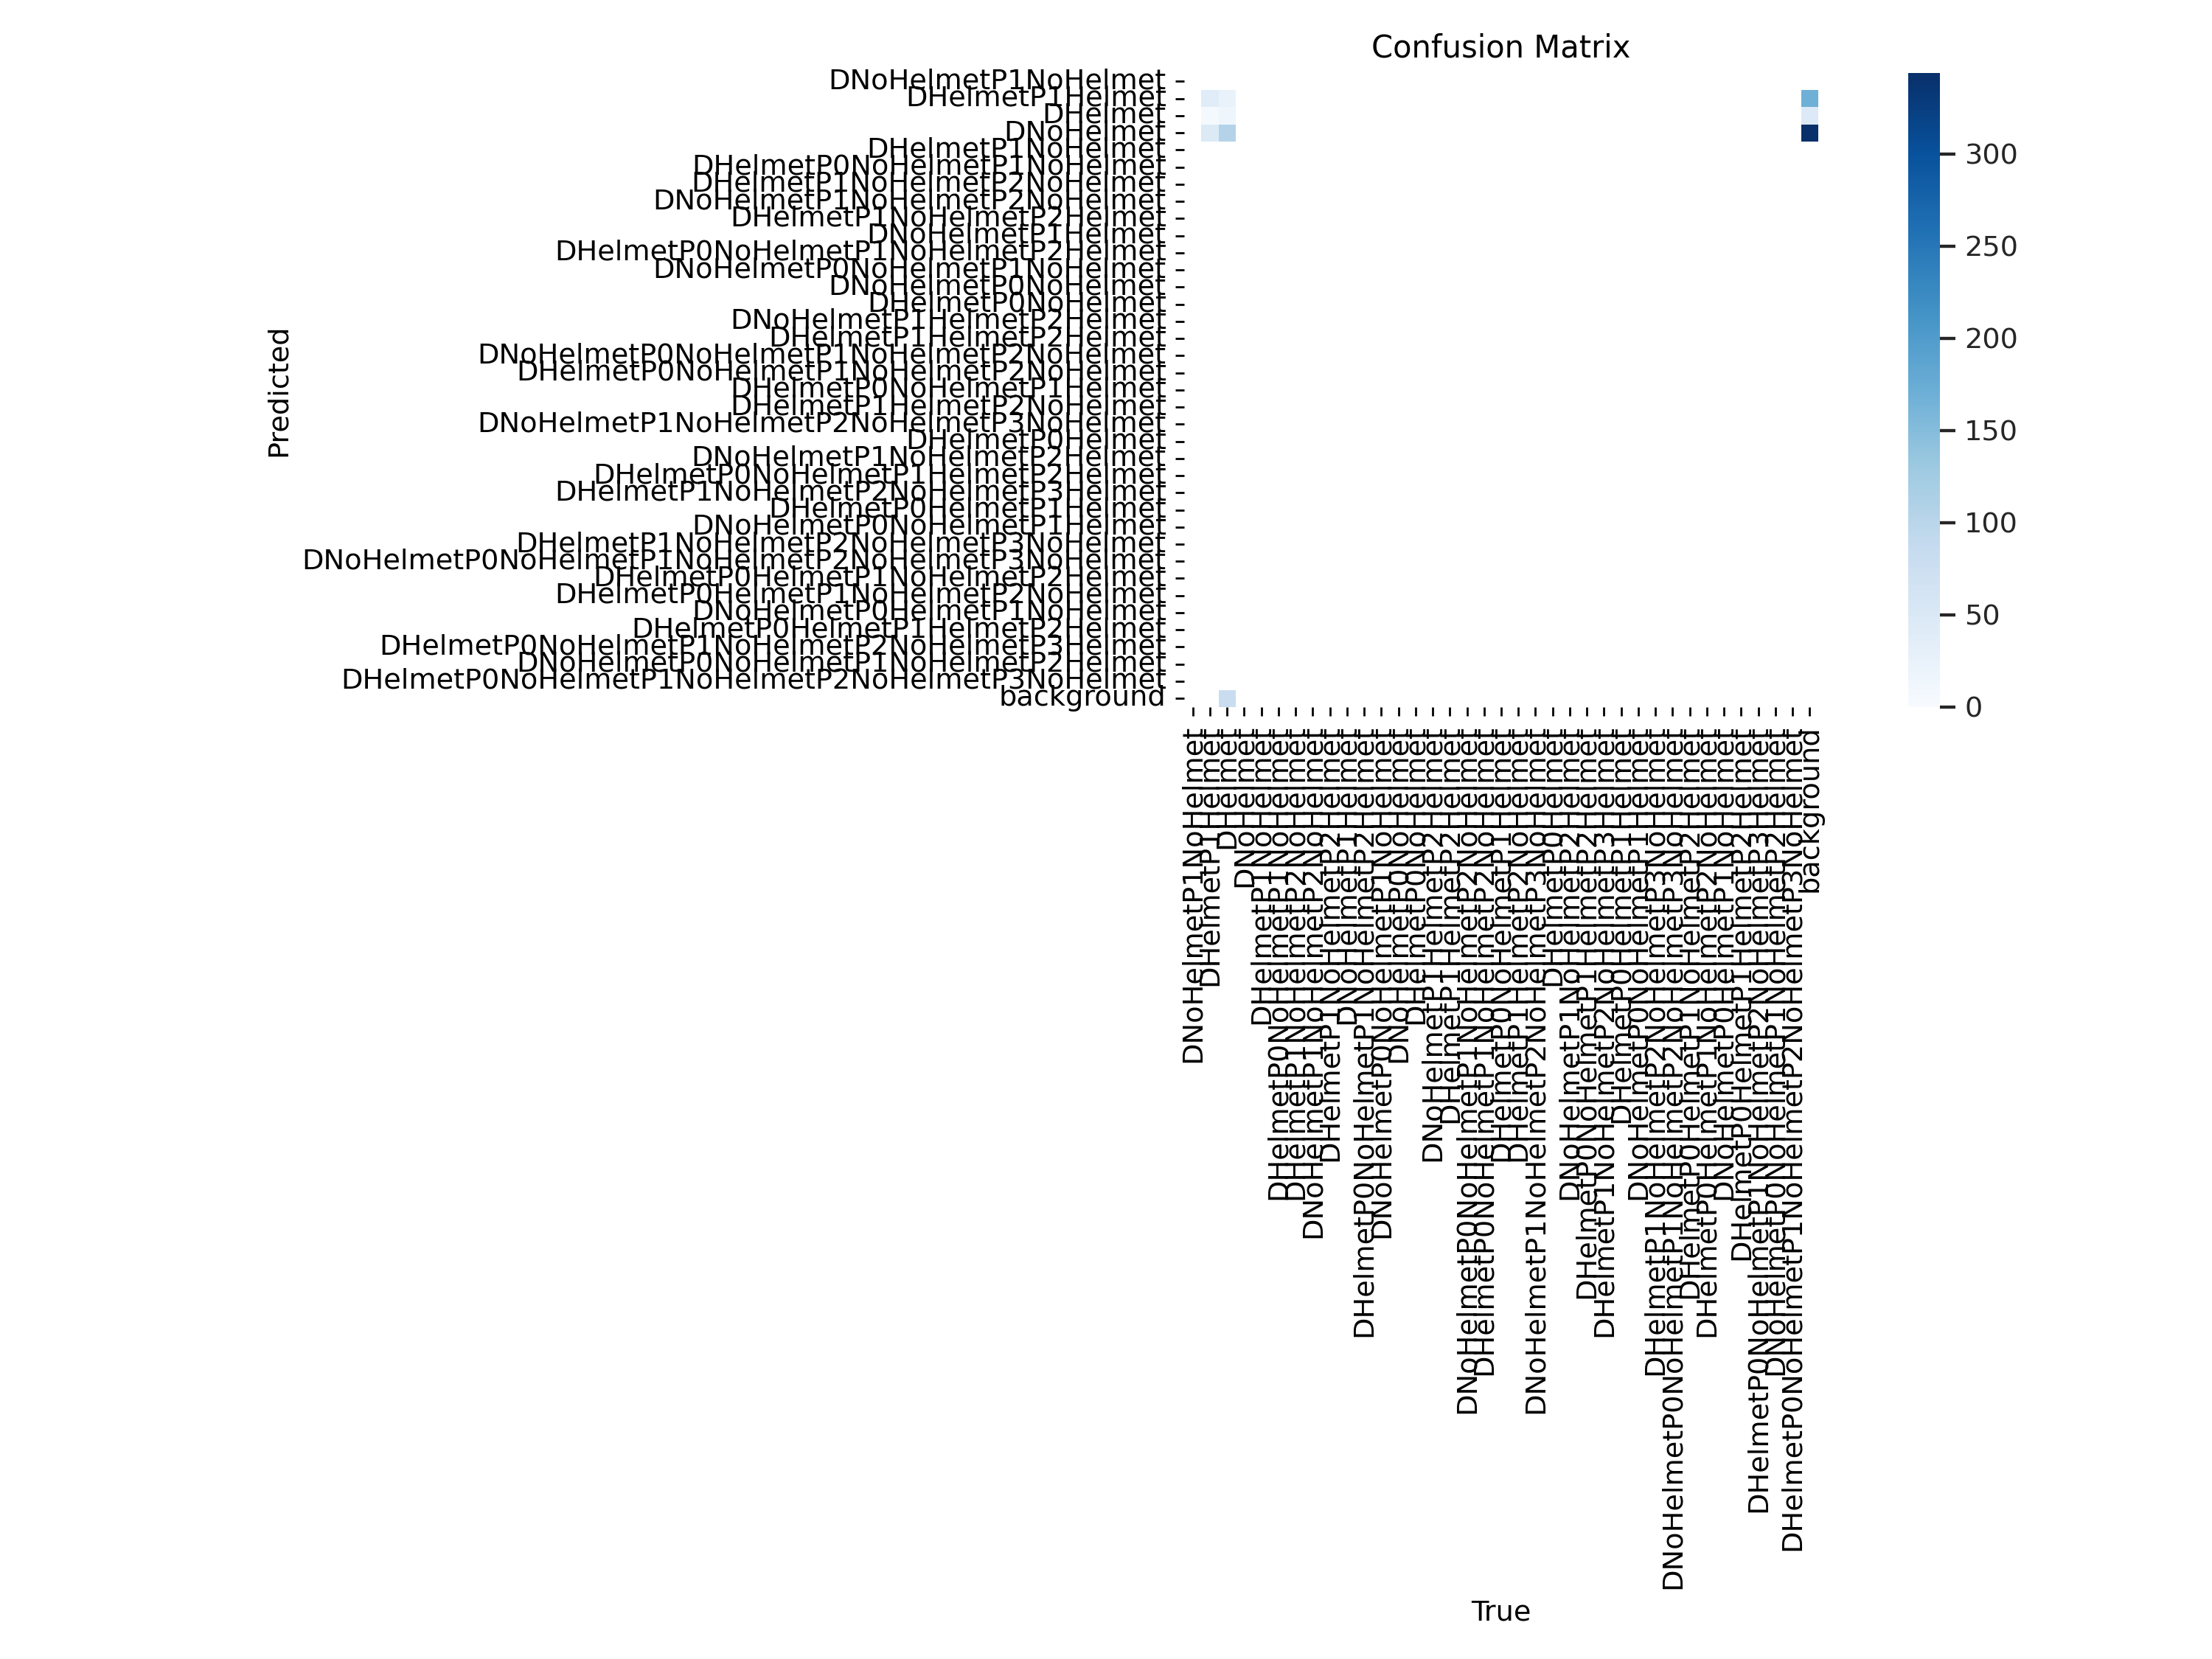

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


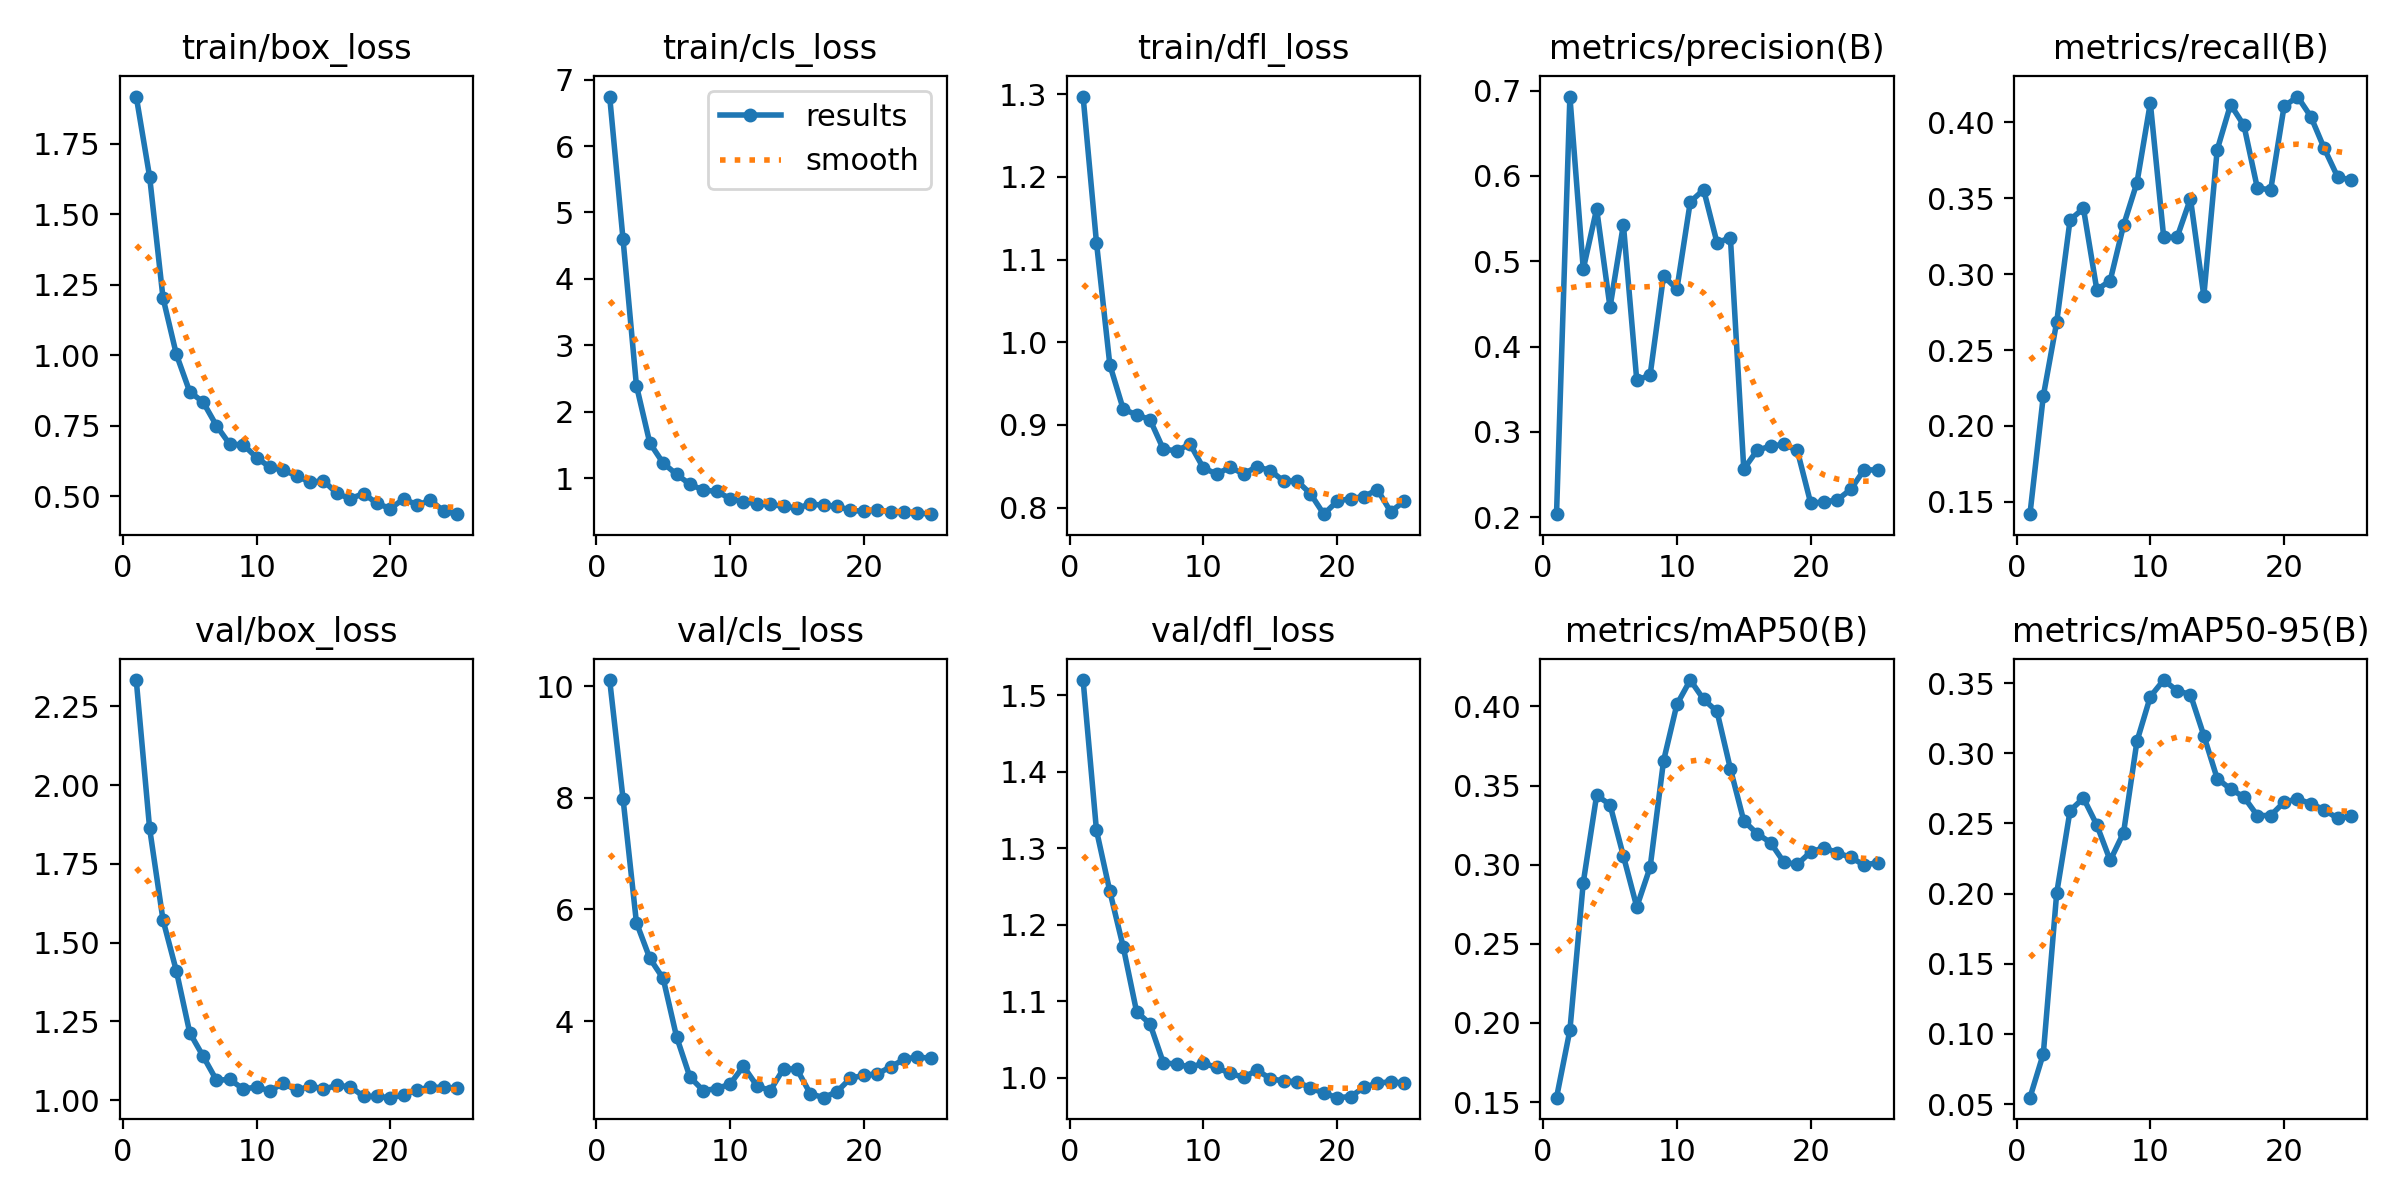

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


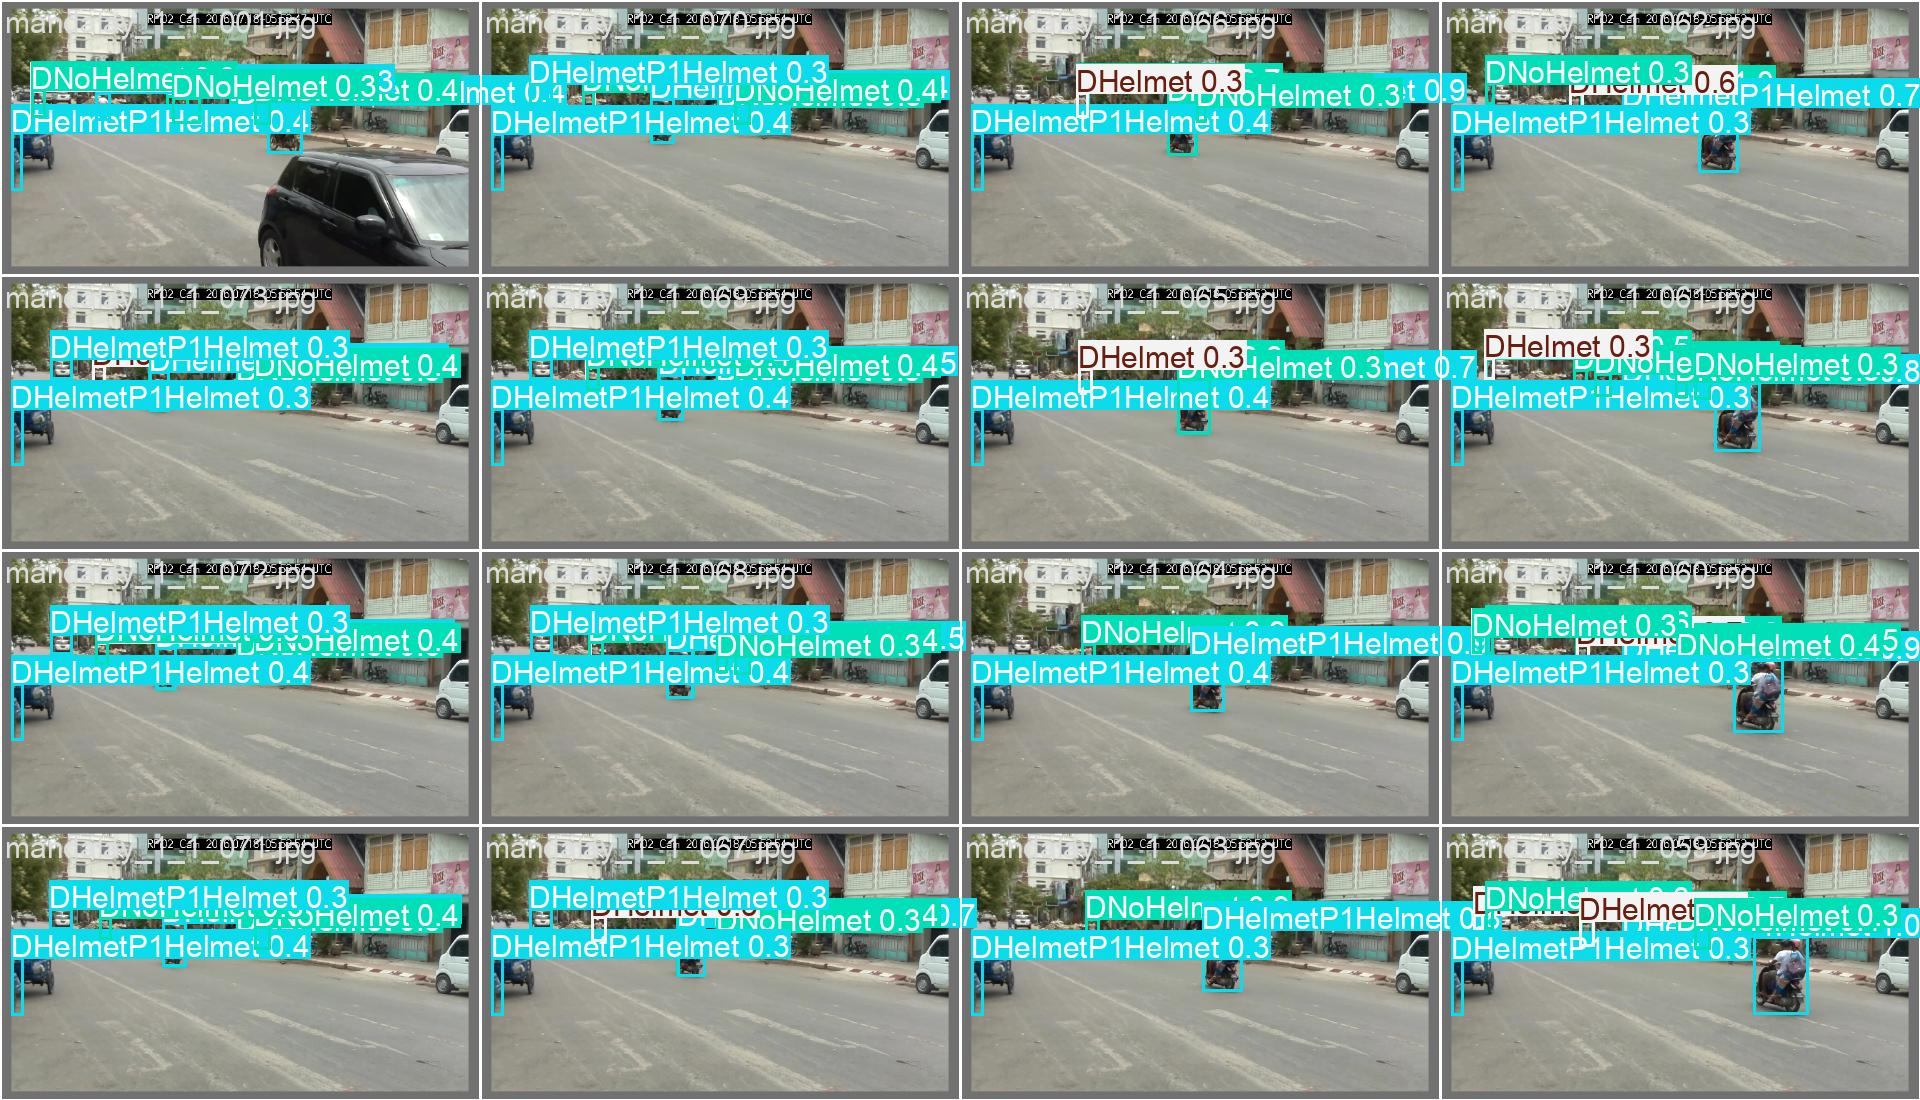

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=1080)

### Prueba Validacion

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={HOME}/NoHelmetNet/dataset/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/NoHelmetNet/dataset/labels/val.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:02<00:00,  2.62it/s]
                   all        100        317       0.57      0.324      0.417      0.353
       DHelmetP1Helmet         91         91      0.597      0.582      0.647      0.572
               DHelmet        100        226      0.543     0.0664      0.187      0.134
Speed: 1.0ms preprocess, 8.5ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inferencia sobre imagenes nuevas

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.05 source={HOME}/NoHelmetNet/raw/Medellin/imagenes save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs

image 1/2 /content/NoHelmetNet/raw/Medellin/imagenes/medellin_1.jpg: 384x640 (no detections), 77.1ms
image 2/2 /content/NoHelmetNet/raw/Medellin/imagenes/medellin_2.jpg: 384x640 (no detections), 10.8ms
Speed: 2.2ms preprocess, 44.0ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


#Revisando Predicciones

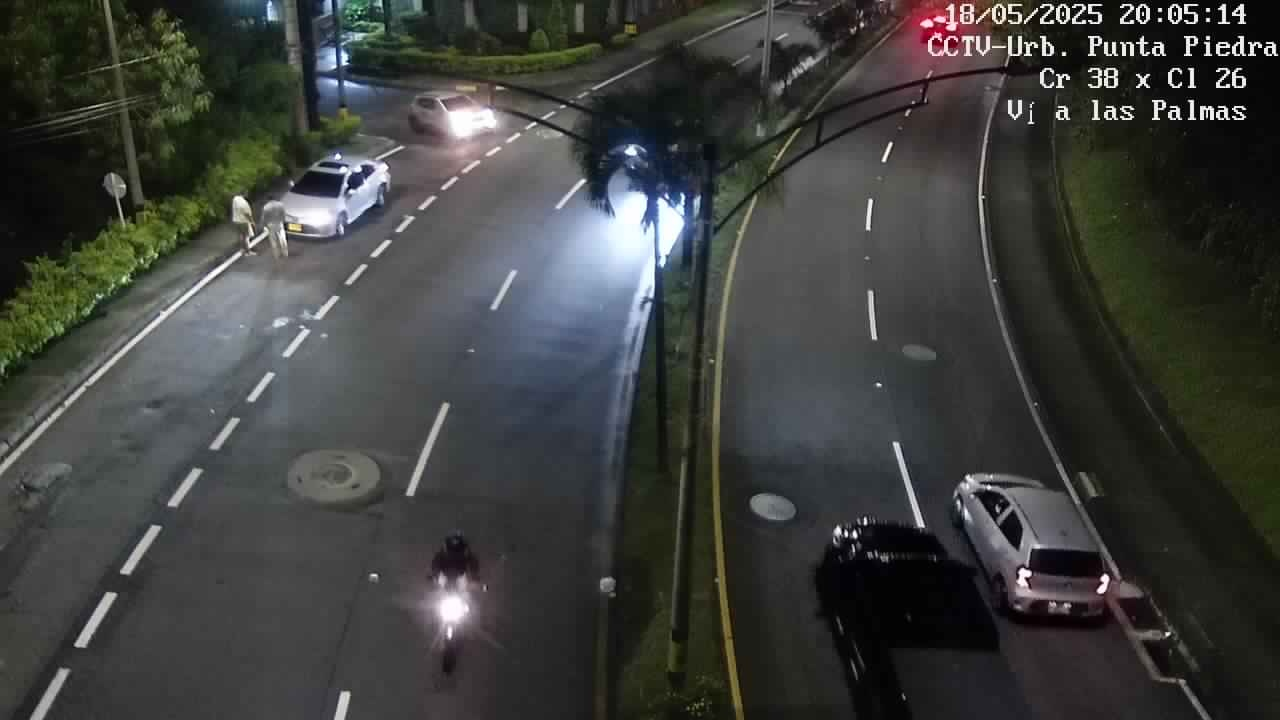

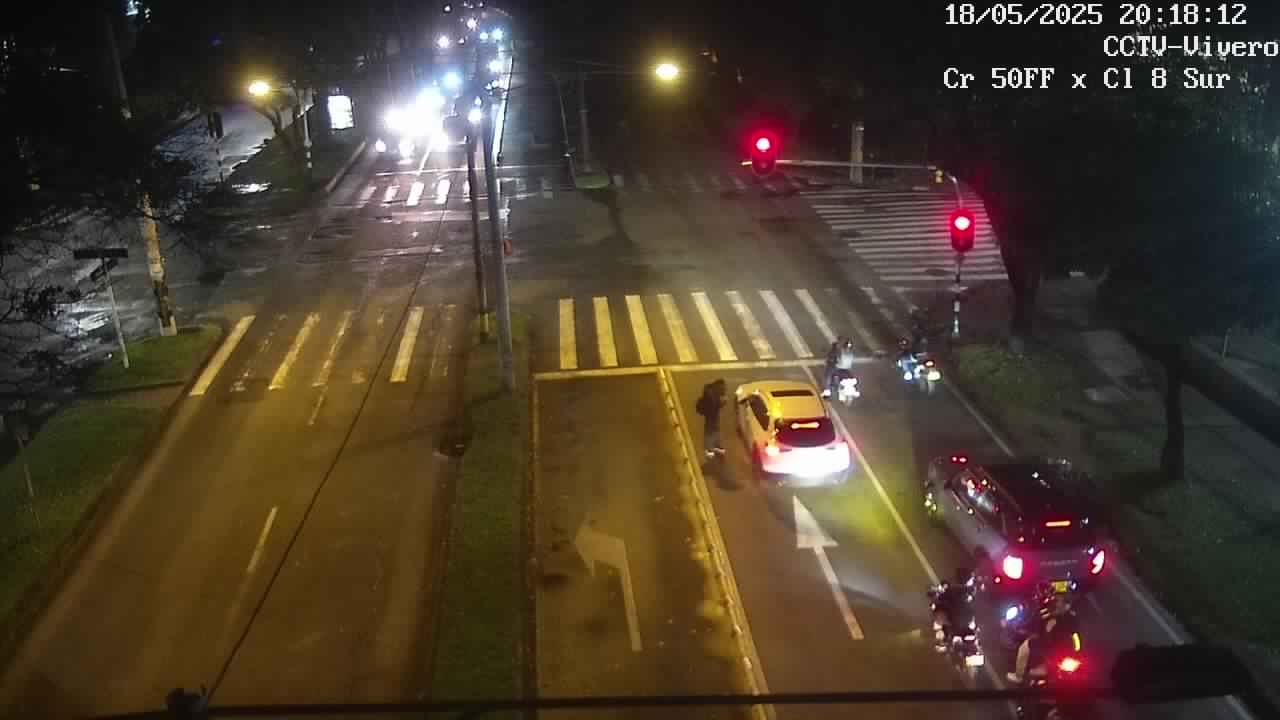

In [22]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")